# [SC57 - Working with big, multi-dimensional geoscientific datasets in Python: a tutorial introduction to xarray](http://meetingorganizer.copernicus.org/EGU2017/session/25651)  
  
  
Original notebook by [Stephan Hoyer](http://stephanhoyer.com), Rossbypalooza, 2016.  
Modified by Edward Byers, Matthew Gidden and [Fabien Maussion](http://fabienmaussion.info/) for EGU General Assembly 2017, Vienna, Austria
Modified by:   
  

* [Dr Chelle Gentemann](mailto:gentemann@esr.org)    - Earth and Space Research, USA
* [Dr Marisol Garcia-Reyes](mailto:marisolgr@faralloninstitute.org)  - Farallon Institute, USA 
-------------

## Open in Colab
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/SUPScientist/Advanced-Quantitative-Oceanography/blob/main/notebooks/Intro_06_Xarray-basics.ipynb)

# With
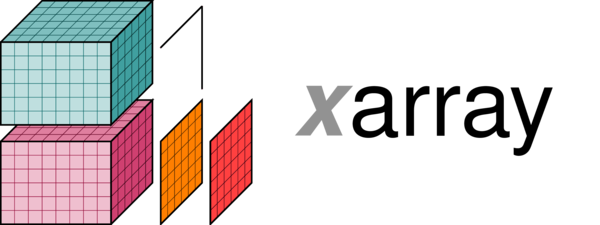


# you can reach


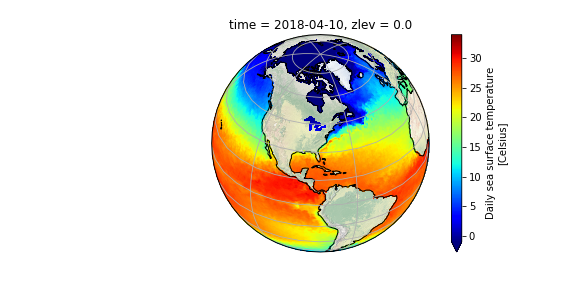

# Structure of this tutorial

1. Introduction to key features of `xarray`
1. Basic data structures in xarray
1. Examining data
1. Plotting data
1. Selecting data
1. Masking data
1. Interpolating data onto different grids




# 1. Key features of `xarray`

## What is `xarray`?

*  `xarray` is an open source project and Python package
*  `xarray` has been designed to perform **labelled** data analysis on **multi-dimensional** arrays
* the `xarray` approach adopts the Common Data Model for **self-describing scientific data** in widespread use in the Earth sciences
*  `xarray.Dataset` is an in-memory representation of a netCDF file.
* `xarray` is built on top of the dataprocessing library [Pandas](http://pandas.pydata.org) (the best way to work with tabular data (e.g., CSV files) in Python)

# Our data

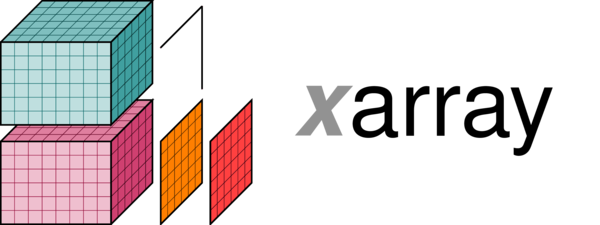

- numeric
- multi-dimensional
- labelled
- (lots of) metadata
- sometimes (very) large

## What is `xarray` good for?

* Gridded, multi-dimensional and large datasets, commonly used in earth sciences, but also increasingly finance, engineering (signal/image processing), and biological sciences
* Integration with other data analysis packages such as Pandas 
* I/O operations (NetCDF)
* Plotting
* Out of core computation and parallel processing
* ...

# 2. Basic data structures in `xarray`

## Remember our basic python data types

`()` are tuples<br>
`[]` are lists <br>
`{}` are dictionaries <br>


-------------------

## Import python packages

- First turn off warnings.  Warnings you can usually ignore, errors you have to fix.
- You will be using numpy, pandas, matplotlib.pyplot and xarray
- Remember that the shortened names (np, pd, plt, xr) shouldn't be used in your code for any variable names, as this will make your code more difficult for someone else to read

In [ ]:
import warnings
warnings.simplefilter('ignore') # filter some warning messages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr

***
##  `DataArrays` is the basic structure in `xarray`

### Here we show the basic components of a dataarray.
- List or Numpy array containing data of any dimension and shape
- The name of your data, try to use something easily understood 
- A dict-like container of coordinates and coordinate values eg. `{'coord1_name':coord1_data, 'coord2_name':,coord2_data}`
- A tuple like container defining the dimensions, eg. `('coord1_name','coord2_name')`

More information on creating a data array using [xr.DataArray](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.html#xarray.DataArray)

`class xarray.DataArray(data, name=None, coords=None, dims=None, attrs=None, encoding=None, indexes=None, fastpath=False)`


In [ ]:
sst_data = [[20,24,21,18],
            [21,23,26,22],
            [19,23,25,21]]

lat_data = [30,35,40]                 #np.arange(30,41,5)
lon_data = [-145, -140,-135,-130 ]    #np.arange(-145,-129,5)

da = xr.DataArray(sst_data,                                  
                  name='sst',             
                  coords={'lat':lat_data,'lon':lon_data},    
                  dims=('lat','lon')                        
                 )                        


## `DataSets` are collection of `DataArrays` with similar dimensions/coordinates, packed together in a dictionary-like structure. 

Use [xr.Dataset](http://xarray.pydata.org/en/stable/generated/xarray.Dataset.html#xarray.Dataset)

`class xarray.Dataset(data_vars=None, coords=None, attrs=None, compat=None)`

* To create a dataset with 3 variables, give a dictionary-like container of DataArrays
* Use `da` that we just created to create a `ds` a dataset with three DataArrays.



In [ ]:
ds = xr.Dataset({'sst':da,
                 'sst_plus':da+0.5,
                 'sst_minus':da-0.5})

## Create an dataset from data rather than a dataarray

In [ ]:
ds2 = xr.Dataset({'sst': (('lat','lon'), sst_data),
                  'sst_copy': (('lat','lon'), sst_data),
                  'sst_copy2': (('lat','lon'), sst_data)},
                  coords={'lat':lat_data,'lon':lon_data}                           
                )

# Print out a variable, examining your data
* The last line in a cell will be printed out if it is a variable or use print().  
* Below in the cell, type the variable `ds` to examine it.
* See what happens if you type `ds` on two separate lines.  Does it print them twice?  
* Use print() to make it print the variable twice

## Properties of `xarray.Dataset` and `xarray.DataArray` objects

We'll start with the CMC SST dataset. Other tutorial examples [here](https://github.com/pydata/xarray/tree/master/examples).

## 3. Examining your data

* With well designed datasets that follow Climate Forecast (CF) conventions, you will usually get coordinates of lat,lon,time which makes it easy to select data and visualize it in different ways.  

* Notice that the time is automatically converted into a np.datetime64 format which can be queried for month, day, etc.  All the variables that are CF compliant are automatically converted (if needed) and read in so that you can immediately start working with the data.  

* Below, you can see that the dimensions are lat, lon, and time

* The coordinates of the datasets are also lat,lon, and time


use [xr.open_dataset](http://xarray.pydata.org/en/stable/generated/xarray.open_dataset.html) to open the provided local filename, url, or other single file access location, and print the dataset

* url is a text string to an online dataset.  When you open a file, you can just use the file name and path or you can just use the url for files that are available online.  If you are running this on the cloud you could even call cloud located data

* Here, we are reading in a global SST dataset called CMC from NASA's PO.DAAC

`ds_sst = xr.open_dataset(url)`<br>
`ds_sst`
   

In [ ]:
#If you are offline use the first url
#url = '../data/20111101120000-CMC-L4_GHRSST-SSTfnd-CMC0.2deg-GLOB-v02.0-fv02.0.nc'
url = 'https://podaac-opendap.jpl.nasa.gov/opendap/allData/ghrsst/data/GDS2/L4/GLOB/CMC/CMC0.2deg/v2/2011/305/20111101120000-CMC-L4_GHRSST-SSTfnd-CMC0.2deg-GLOB-v02.0-fv02.0.nc'

ds_sst = xr.open_dataset(url)

ds_sst


## Metadata --- Examining your data


* The data variable (analysed_sst) has the labeled dimensions and metadata attached.  You can see additional metadata (if it exists) by looking at the data variable of interest. 

* You can access dataset variables by either using `.variable_name` or `['variable_name']`.  The first way is usually easier, but the second way is useful, especially if your variable name has a `.` in it

* Below, type 
```print(ds_sst.ana``` then hit tab to autocomplete.  
```print(ds_sst['ana``` then hit table to autocomplete.
* Then run the cell by holding shift and pressing enter.



* Some more details on extracting info from an xarray dataset, to get attributes use `ds_sst.analysed_sst.attrs`

* If you want to get at the values in a data variable use `ds_sst.analysed_sst.values` or `ds_sst.analysed_sst.data`

* Look to see what type of array this produces using `type(ds_sst.analysed_sst.values)`

* Look at the dimensions using `ds_sst.analysed_sst.dims`

* Look at the size of one dimension using `ds_sst.lat.size`

## Let's open another file
Below, let's open CCMP winds for the same day using xarray.
* To open a file use [xr.open_dataset](http://xarray.pydata.org/en/stable/generated/xarray.open_dataset.html) `xr.open_dataset(url)`

* The url filename we want to use is already included for you.

* Then just print out the file details by just typing the dataset name, ds_ccmp

In [ ]:
#if you are offline, use the first url
#url = '../data/analysis_20111101_v11l30flk.nc'
url = 'https://podaac-opendap.jpl.nasa.gov/opendap/allData/ccmp/L3.0/flk/2011/11/analysis_20111101_v11l30flk.nc.gz'

ds_ccmp = xr.open_dataset(url)

ds_ccmp

## If you look at the time values you can see that the dataset is at :00, :06, :12, :18

* If you look at the lon values you can see that this dataset is 0-360 rather than -180-180, 

*  let's change the longitude coordinates using [.coords](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.coords.html) and then [.sortby](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.sortby.html) |

## To get from 0-360 to -180-180

`ds_ccmp.coords['lon'] = np.mod(ds_ccmp.coords['lon'] + 180,360) - 180`  
`ds_ccmp = ds_ccmp.sortby(ds_ccmp.lon)`


## To get from -180-180 to 0-360

`ds_ccmp.coords['lon'] = np.mod(ds_ccmp['lon'], 360)`
`ds_ccmp = ds_ccmp.sortby(ds_ccmp.lon)`


* Transform the CCMP winds to -180 to 180 and print out the result below

## Let's Do Some Math 

* To calculate the wind speed use numpy's sqrt function `np.sqrt()`  
* To assign a new variable in the dataset use `ds_ccmp['wind_speed'] =`

`ds_ccmp['wind_speed'] = np.sqrt(ds_ccmp.uwnd**2 + ds_ccmp.vwnd**2)`


## Calculate the daily mean wind speed

* Calculate the mean over time using [DataArray.mean()](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.mean.html).  This will take the mean of all the `DataArray` in this `DataSet`.  It has lots of useful options, like `keep_attrs = True` which saves all the attributes for future reference and `skipna = True` which can be useful when calculating climatologies where you only want to keep data when a full record is present.   
* When calling `.mean` it can operate across all variables in a dataset or only on specified ones.

Below, type:
`print(ds_ccmp.wind_speed.mean())`

## Calculate the daily mean wind speed by lat or lon and plot the result, the first argument to mean is dim.  
* For one argument just put it in quotes as the argument in `mean(dim = 'time')`
* For more than one, create a tuple () argument. `mean(dim=('time','lat'))`

# 4. Plotting with xarray datasets

xarray [plotting](http://xarray.pydata.org/en/stable/plotting.html#plotting) functionality is a thin wrapper around the popular matplotlib library. Matplotlib syntax and function names were copied as much as possible, which makes for an easy transition between the two. Matplotlib must be installed before xarray can plot.

* For the simplest plot just type `.plot()` after a dataset variable
* `.plot()` takes usual matlab-like arguments
* Notice how xarray using the metadata attributes to label the axis and colorbar

Try plotting the mean daily average wind speed below with:

`ds_ccmp.wind_speed.mean(dim='time').plot()`

# 5. Selecting data 

In `xarray` there are many different ways for selecting and indexing data.

### Positional indexing (old way)

* This is the "old way", i.e. like ``numpy`.  You the programmer know something about your data and the coordinates, and can select data directly using the indices.  Note that when you do this the attributes, coordinates are preserved.  

* While there is often a time that using indices is preferred, it can be difficult for someone else to understand your code.  

Type:
  `ds_sst.analysed_sst[0, :, 900]`

## Plot your selection using `.plot()`

Type:
`ds_sst.analysed_sst[0, :, 900].plot()`

## There are different ways to select or mask data in xarray.  

* You can use .isel or .sel to select by coordinates, but if you want to select by a data variable you need to use .where



### Selection by index (old way, but sometimes necessary)

Selection based on the **index** of a coordinate:
Plot the first time index of the SST data

`ds_sst.analysed_sst[0,:,:].plot()`

# A little bit easier for people to read, use [.isel](http://xarray.pydata.org/en/stable/generated/xarray.Dataset.isel.html#xarray-dataset-isel)

* Selection basd on the **index** of a coordinate
* This implies prior knowledge about the structure of the data, and is therefore much less readable than the "xarray methods" presented below.  What is `time=0`?  You have to query time to find out. 

`ds_sst.analysed_sst.isel(time=0).plot()`

## Preferred way, Selection by value using [.sel](http://xarray.pydata.org/en/stable/generated/xarray.Dataset.sel.html#xarray-dataset-sel)


Selection based on the **value** of a coordinate:

`ds_sst.analysed_sst.sel(time='2011-11-01T12').plot()`

## Selecting a range of values

* Let's try to select a region off the California coast, lat 20 to 50 and lon -140 to -110

* The syntax is similar, but you'll need to use a [slice](https://docs.python.org/3/library/functions.html#slice):

`ds_sst.analysed_sst.sel(lat=slice(20,50),lon=slice(-140,-110)).plot()`

### Nearest neighbor lookup using .sel

- Method to use for inexact matches:

&nbsp;&nbsp;&nbsp;&nbsp;**None** (default): only exact matches.<br>
&nbsp;&nbsp;&nbsp;&nbsp;pad / **ffill**: propagate last valid index value forward.<br>
&nbsp;&nbsp;&nbsp;&nbsp;backfill / **bfill**: propagate next valid index value backward.<br>
&nbsp;&nbsp;&nbsp;&nbsp;**nearest**: use nearest valid index value.<br>

`ds_sst.analysed_sst.sel(lat=10, method='nearest').plot()`

## 6. Masking data 

* Mask your data based on values of variables use [.where](http://xarray.pydata.org/en/stable/generated/xarray.DataArray.where.html). <br> This can be useful to look subsets of data based on data values of itself or other variables.  

`ds_sst.analysed_sst.where(ds_sst.mask==1).plot()`

After you look at the result from that line of code, try masking using two conditions:

`ds_sst.analysed_sst.where(((ds_sst.mask==1) & (ds_sst.analysed_sst>290))).plot()`

## 7.  Interpolation

## What if we want to look at two datasets together?

* CMC SSTs are on a 0.2 deg grid, while CCMP winds are on a 0.25 deg grid<br>
* xarray provides [.interp](http://xarray.pydata.org/en/stable/generated/xarray.Dataset.interp.html) and [.interp_like](http://xarray.pydata.org/en/stable/generated/xarray.Dataset.interp_like.html) for interpolation of data
* To compare these two datasets, we first need to put them on the same grid

Interpolate the CCMP wind speed dataset so that it is on the same grid as the CMC SST data

`ds_ccmp_interp = ds_ccmp.interp_like(ds_sst)`

Again, this demonstrates the power of xarray as it performs the interpolation for all data variables

After you interpolate it, print out the dataset

`print(ds_ccmp_interp)`


## Now that CCMP wind vectors are on the same coordinate system as CMC SST data we can use .where to mask wind data using the SST land mask



`ds_ccmp_interp.wind_speed.where(ds_sst.mask==1).plot()`



# xarray can do more!

* concatentaion
* open network located files with openDAP
* import and export Pandas DataFrames
* .nc dump to 
* groupby_bins
* resampling and reduction

For more details, read this blog post: http://continuum.io/blog/xray-dask


In [ ]:
#ds_collocated_nearest.to_netcdf('./data/new_file.nc')
#ds_collocated_nearest.to_zarr('./data/new_file.zarr')

## Where can I find more info?

### For more information about xarray

- Read the [online documentation](http://xarray.pydata.org/)
- Ask questions on [StackOverflow](http://stackoverflow.com/questions/tagged/python-xarray)
- View the source code and file bug reports on [GitHub](http://github.com/pydata/xarray/)

### For more doing data analysis with Python:

- Thomas Wiecki, [A modern guide to getting started with Data Science and Python](http://twiecki.github.io/blog/2014/11/18/python-for-data-science/)
- Wes McKinney, [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do) (book)

### Packages building on xarray for the geophysical sciences

For analyzing GCM output:

- [xgcm](https://github.com/xgcm/xgcm) by Ryan Abernathey
- [oogcm](https://github.com/lesommer/oocgcm) by Julien Le Sommer
- [MPAS xarray](https://github.com/pwolfram/mpas_xarray) by Phil Wolfram
- [marc_analysis](https://github.com/darothen/marc_analysis) by Daniel Rothenberg

Other tools:

- [windspharm](https://github.com/ajdawson/windspharm): wind spherical harmonics by Andrew Dawson
- [eofs](https://github.com/ajdawson/eofs): empirical orthogonal functions by Andrew Dawson
- [infinite-diff](https://github.com/spencerahill/infinite-diff) by Spencer Hill 
- [aospy](https://github.com/spencerahill/aospy) by Spencer Hill and Spencer Clark
- [regionmask](https://github.com/mathause/regionmask) by Mathias Hauser
- [salem](https://github.com/fmaussion/salem) by Fabien Maussion

Resources for teaching and learning xarray in geosciences:
- [Fabien's teaching repo](https://github.com/fmaussion/teaching): courses that combine teaching climatology and xarray
